In [1]:
from scipy.spatial import ConvexHull
from matplotlib import pyplot as plt
import numpy as np
import json

In [54]:
with open('json/12.json', 'r') as file:
    jsf = json.load(file)
    data = jsf['drawings']

In [55]:
def get_env_points(shape):
    points = [ [point[0], 400 - point[1]] for path in shape for point in path ]
    points = np.array(points)
    hull = ConvexHull(points)
    envelop_points = hull.points[hull.vertices]
    return envelop_points

def get_distance(A, B):
    xa, ya = A
    xb, yb = B
    return ((xa-xb)**2 + (ya-yb)**2)**0.5

def get_length(points):
    length = 0
    for ip in range(len(points)):
        p0 = points[ip]
        p1 = points[(1+ip)%len(points)]
        length+= get_distance(p0, p1)
    return length

def get_triangleArea(A,B,C):
    a = get_distance(A, B)
    b = get_distance(B, C)
    c = get_distance(C, A)

    p = (a+b+c)/2
    area = (p * (p-a) * (p-b) * (p-c))**0.5
    return area


def get_area(points):
    area = 0
    A = points[0]
    for ip in range(1,len(points)-1):
        B= points[ip]
        C= points[ip + 1]
        area += get_triangleArea(A, B, C)

    return area

def get_roundness(shape):
    from math import pi
    hull_points = get_env_points(shape)
    length = get_length(hull_points)
    area = get_area(hull_points)
    R = length/(2*pi)
    circle_area = pi*R**2
    roundness = area/circle_area
    return roundness

    

In [56]:
def draw_shape(paths, title = ''):
    env_points = get_env_points(paths)
    env_points = np.concatenate((env_points, [env_points[0]]))
    fig, ax = plt.subplots()
    for path in paths:
        X = []
        Y = []
        for point in path:
            x, y = point
            X.append(x)
            Y.append(400-y)
        ax.plot(X,Y, color = 'k')
    ax.plot(env_points[:,0], env_points[:,1], color='r', linestyle = '--')
    #ax.scatter(points[:,0], points[:,1], color='k', s=.3)

    ax.set_xlim(0,400)
    ax.set_ylim(0,400)
    if title: plt.title(title)
    plt.show()

In [57]:
get_roundness(data['clock'])

0.9463385066366289

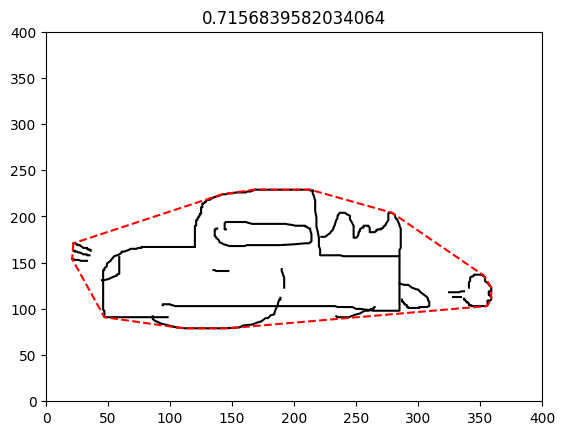

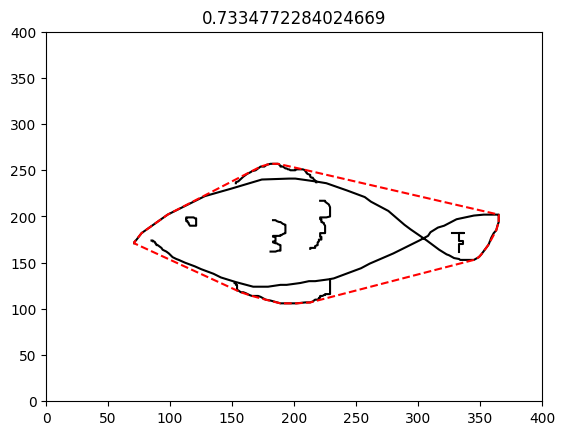

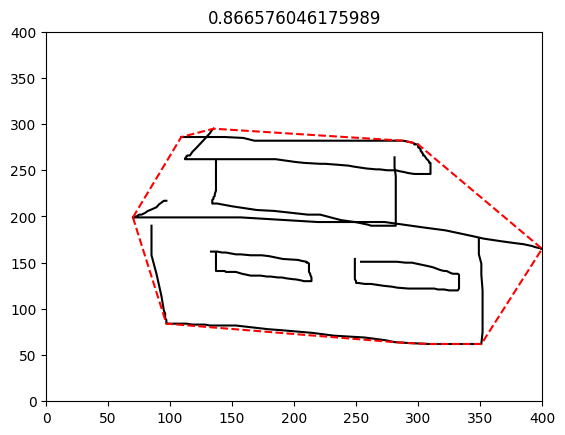

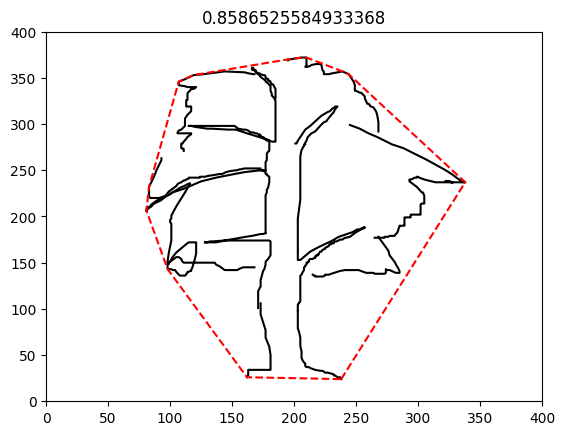

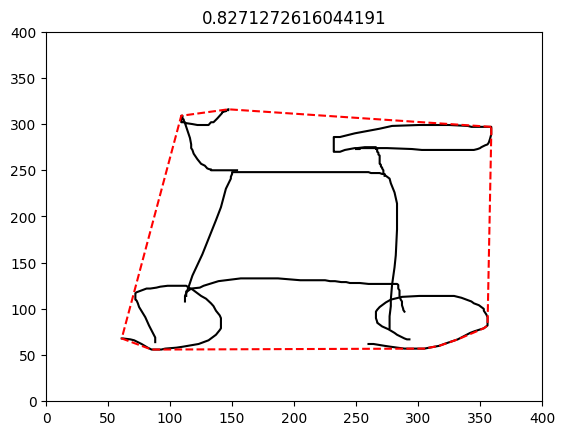

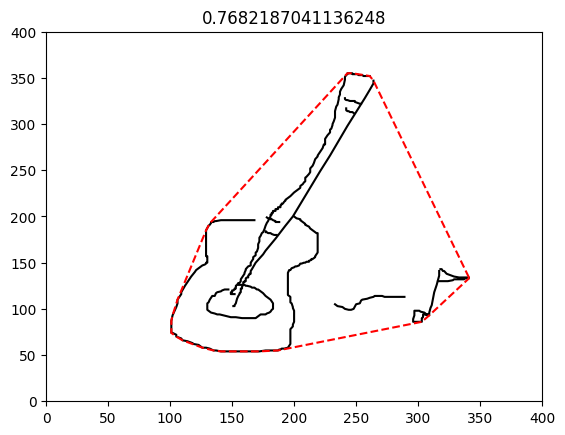

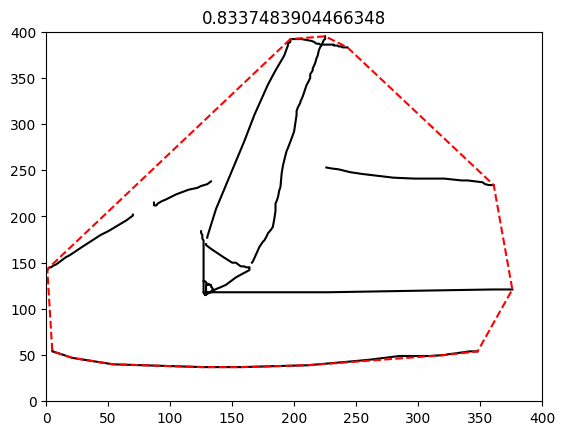

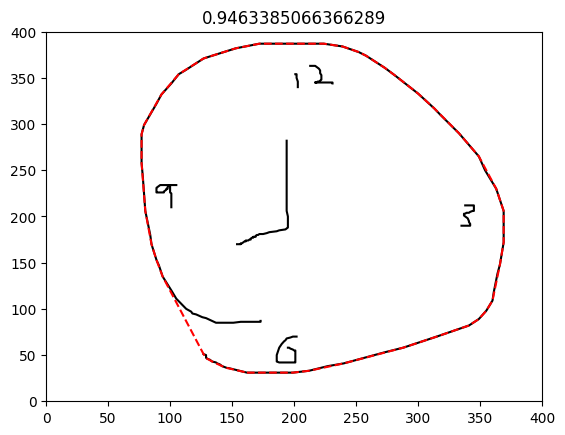

In [58]:
for paths in data.values():
    draw_shape(paths, get_roundness(paths))